In [112]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

In [113]:
data = pd.read_csv(r'C:\Users\asus\Documents\airlinepassengers.csv')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [115]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [116]:
data['Date']=pd.to_datetime(data['Month'])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    object        
 1   Passengers  144 non-null    int64         
 2   Date        144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [117]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day
data.head()

,Month,Passengers,Date,year,month,day
0,1949-01,112,1949-01-01,1949,1,1
1,1949-02,118,1949-02-01,1949,2,1
2,1949-03,132,1949-03-01,1949,3,1
3,1949-04,129,1949-04-01,1949,4,1
4,1949-05,121,1949-05-01,1949,5,1


In [44]:
data['year'].value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

In [46]:
data['month'].value_counts()

12    12
11    12
10    12
9     12
8     12
7     12
6     12
5     12
4     12
3     12
2     12
1     12
Name: Month, dtype: int64

Visualization

# Time Plot for temperature

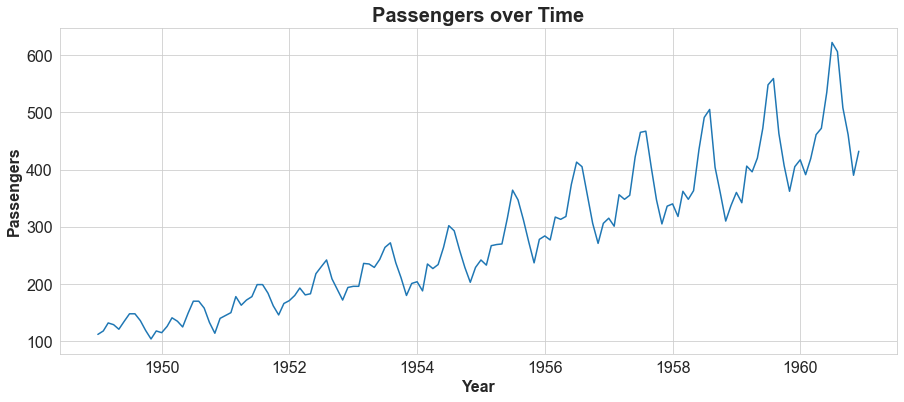

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data['Date'], data['Passengers'] )

ax.set_title('Passengers over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Passengers', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

The variable has a increasing trend and a strong seasonality.

# Seasonal Plots and Box plots

Text(0, 0.5, 'Passengers')

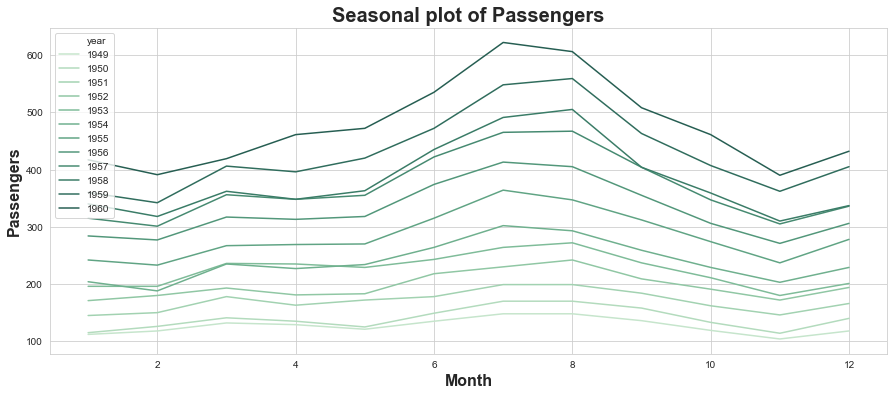

In [50]:
variable = 'Passengers'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 12)
sns.lineplot(data['month'], data[variable], hue=data['year'], palette=palette)
ax.set_title('Seasonal plot of Passengers', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Passengers', fontsize = 16, fontdict=dict(weight='bold'))


Text(0, 0.5, 'Passengers')

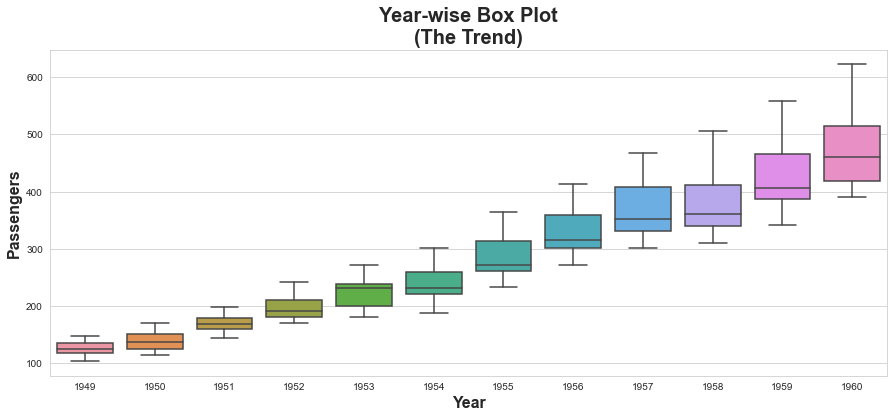

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.boxplot(data['year'], data[variable])
ax.set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Passengers', fontsize = 16, fontdict=dict(weight='bold'))


This two graphs shows the strong seasonality of the data.

In the seasonal plot we can instantly see:
  .More clearly the seasonal pattern if it exists.
  .Identify the years in which the pattern changes.
  .Identify large jumps or drops.
  
In the trend and seasonality plots we can see:

  .More clearly the trend and the seasonality. For example, although we could say salinity had seasonality from the previous plots, now it is more evident that it has.
  .Years or months with outliers.
  .Compare years or months easier.

# Seasonal Subseries Plot

An alternative plot that emphasizes the seasonal patterns is where the data for each season are collected together in separate mini time plots.

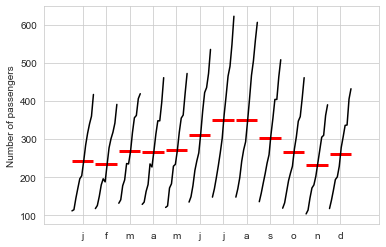

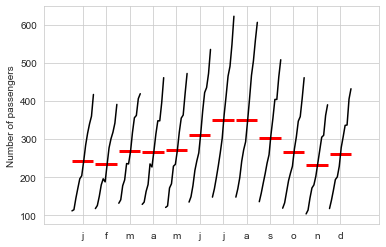

In [76]:
data= data.set_index('Date')
month_plot(data['Passengers'],ylabel='Number of passengers')

It performs a groupby to see more clearly the months of seasonality.

# Decomposition

In [83]:
y = data
y = y.set_index('Date')
y

,Month,Passengers,year,day
Date,,,,
1949-01-01,1,112,1949,1
1949-02-01,2,118,1949,1
1949-03-01,3,132,1949,1
1949-04-01,4,129,1949,1
1949-05-01,5,121,1949,1
...,...,...,...,...
1960-08-01,8,606,1960,1
1960-09-01,9,508,1960,1
1960-10-01,10,461,1960,1


In [121]:
y=data[['Passengers','Date']]
y = y.set_index('Date')
y

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Text(0.5, 0.98, 'Temperature Decomposition')

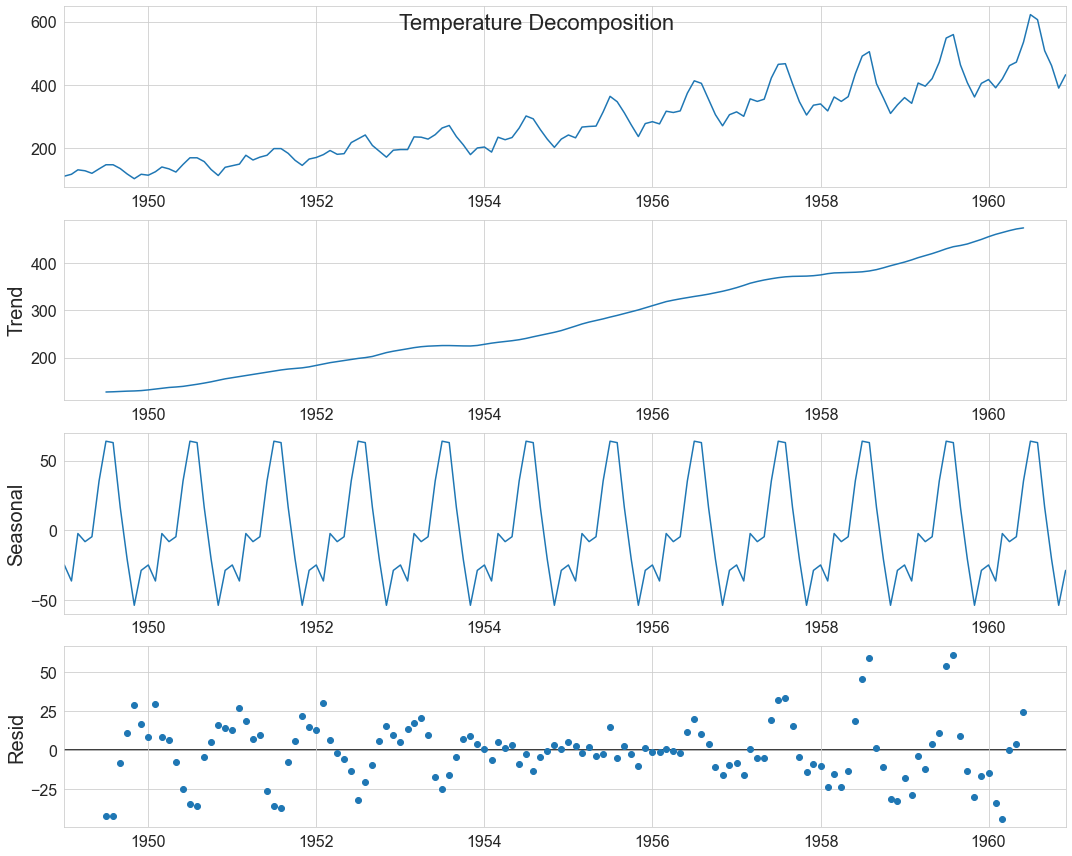

In [122]:


from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=22)

The Hodrick-Prescott filter separates a time-series yt into a trend component τ and a cyclical component ct. For monthly data lambda=129,600.

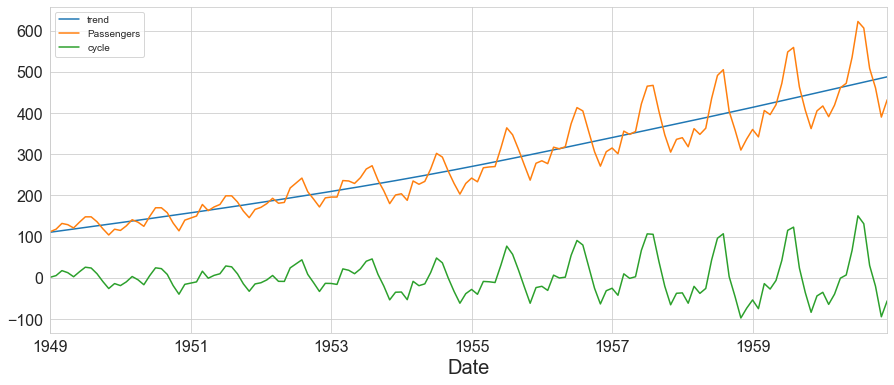

In [123]:
from statsmodels.tsa.filters.hp_filter import hpfilter

gdp_cycle, gdp_trend = hpfilter(y['Passengers'], lamb=129600)
y['trend'] = gdp_trend
y['cycle'] = gdp_cycle

y[['trend','Passengers','cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True);

# Measure the strength of trend. 0 for low, 1 for high

In [124]:
1-decomposition.resid.var()/(decomposition.resid+decomposition.trend).var()

0.9655302562219285

# Measure the strength of seasonality

In [125]:
max(0,(1-decomposition.resid.var()/(decomposition.resid+decomposition.seasonal).var()))

0.7787219427520644

We can say that there is a strong trend compared to seasonality

Detrend

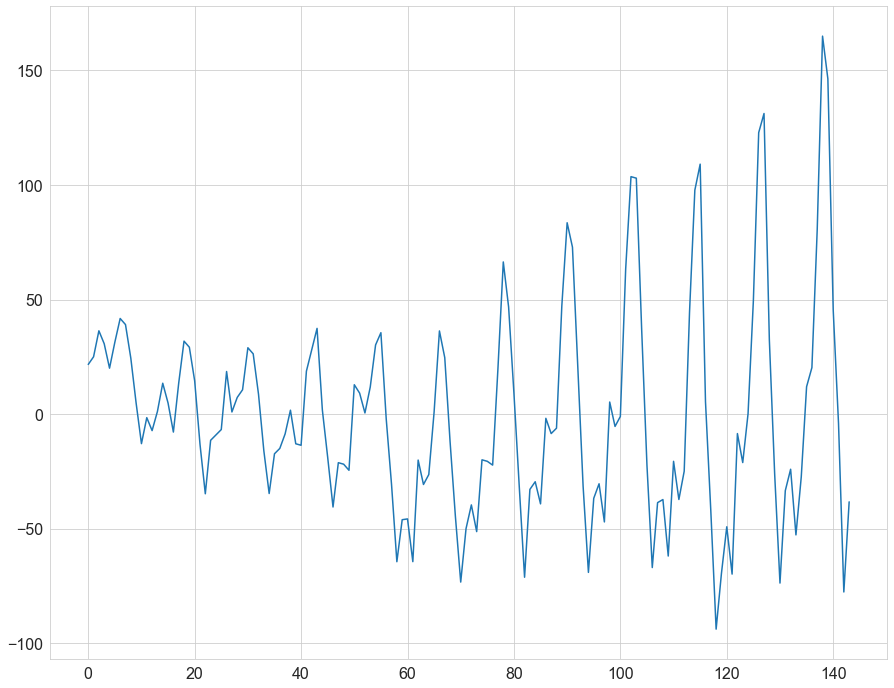

In [126]:
detrended = signal.detrend(y['Passengers'].values)
plt.plot(detrended)

# Stationarity

# ADF

In [127]:
from statsmodels.tsa.stattools import adfuller
# check for stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [128]:
adf_test(y['Passengers'],title='')

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


The series is not stationary. . So because the P-Value is > 0.05 we accept the null hypothesis.

# KPSS

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.

In [129]:
# KPSS Test
result = kpss(y['Passengers'].values, regression='c')
print("\nKPSS Statistic: {}".format(result[0]))
print("P-Value: {}".format(result[1]))
for key, value in result[3].items():
    print('Critial Values:')
    print("   {}, {}".format(key,value))


KPSS Statistic: 1.0521750110135097
P-Value: 0.01
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


# Autocorrelation

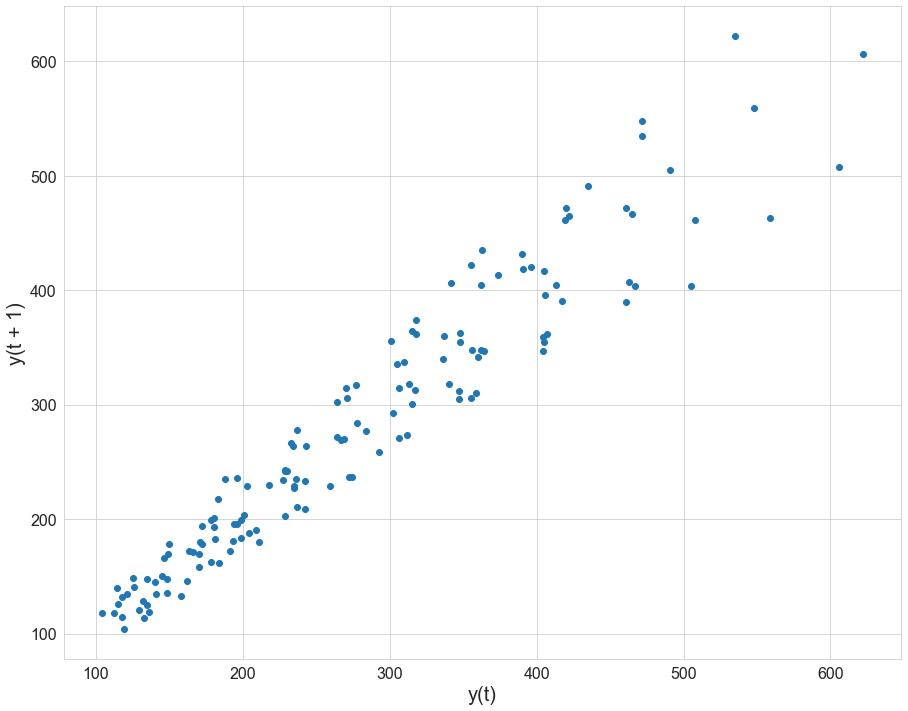

In [135]:
# Lag PLots
from pandas.plotting import lag_plot
lag_plot(y['Passengers']);

In [136]:
series = pd.Series(data=data.Passengers.values,index=data['Date'])
series

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

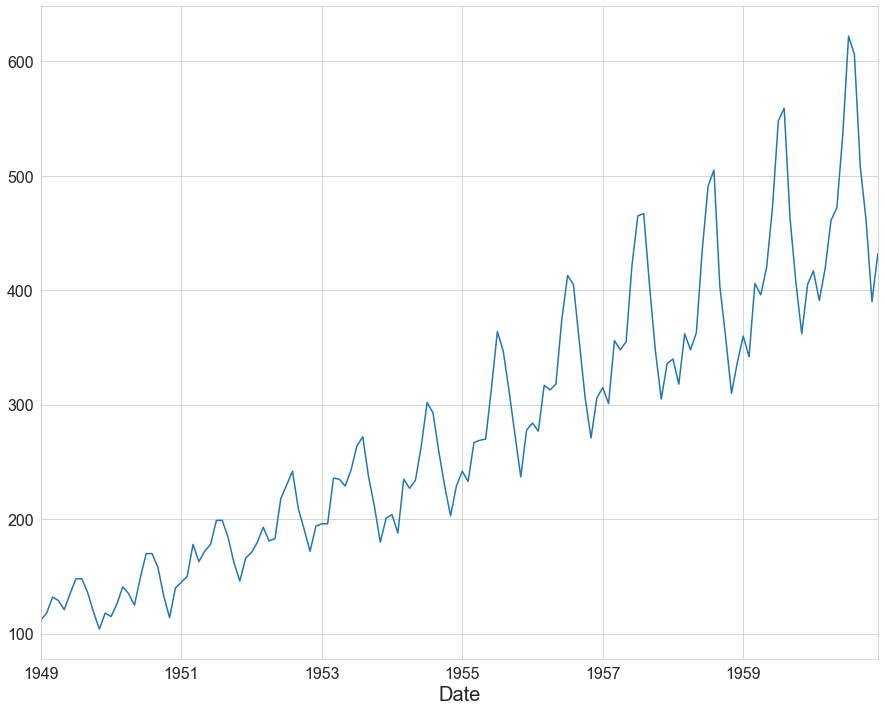

In [137]:
series.plot()
plt.show()

In [54]:
print(series.describe())

count    70320.000000
mean        19.769383
std          4.604688
min          6.302946
25%         15.764087
50%         19.132276
75%         23.680054
max         31.052060
dtype: float64


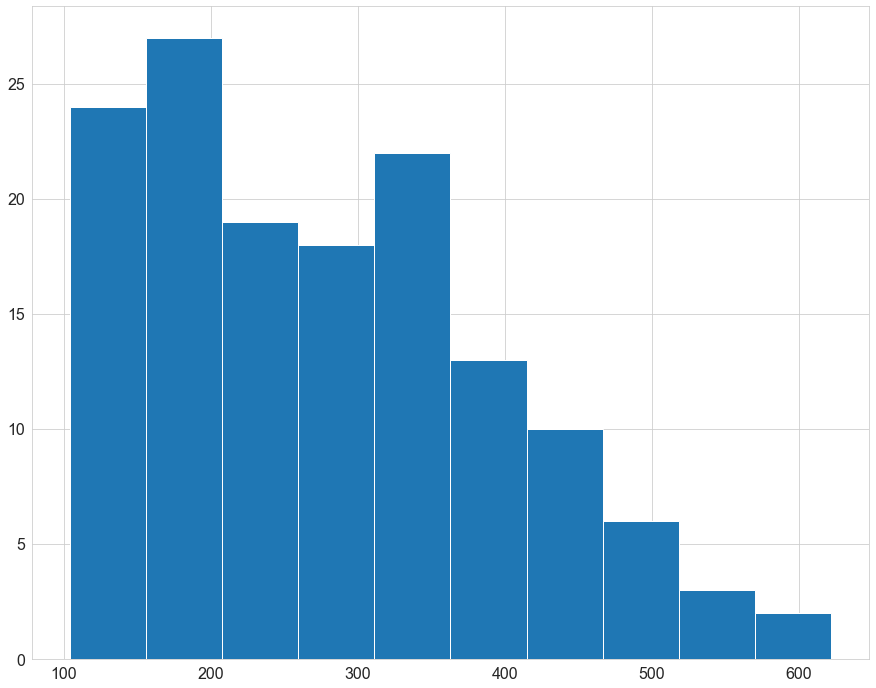

In [138]:
# histogram plot
series.hist()
plt.show()

In [139]:
import statsmodels.api as sm
res = sm.stats.acorr_ljungbox(series, lags=[5])
print(f"Resultat du test Ljung-Box p-value: {  res[1][0] }")

Resultat du test Ljung-Box p-value: 7.360195242554619e-107


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Autocorrelation

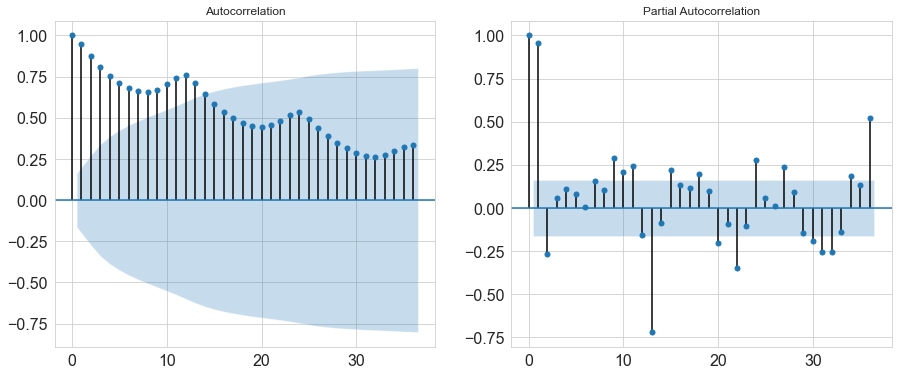

In [140]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
#autocorr = acf(data[variable], nlags=12) # just the numbers
plot_acf(data[variable].tolist(), lags=36, ax=ax[0]); # just the plot
plot_pacf(data[variable].tolist(), lags=36, ax=ax[1]); # just the plot

Simple Moving Average, expanding and Exponentially Weighted Moving Average

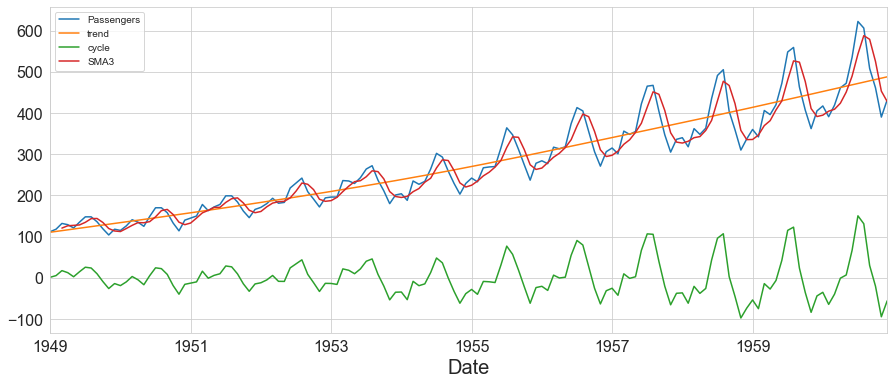

In [148]:
y['SMA3'] = y['Passengers'].rolling(window=3).mean() 
y.plot(figsize=(15,6));

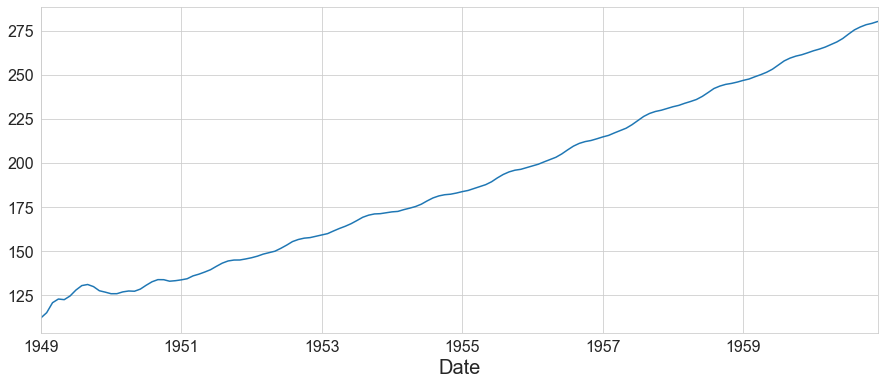

In [149]:
y['Passengers'].expanding().mean().plot(figsize=(15,6));

In [150]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 3
alpha = 2/(span+1)
y.index.freq = 'MS'
y['SES3']=SimpleExpSmoothing(y['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues
y.head()

,Passengers,trend,cycle,SMA3,SES3
Date,,,,,
1949-01-01,112,110.642382,1.357618,NaN,112.00
1949-02-01,118,112.572298,5.427702,NaN,112.00
1949-03-01,132,114.502226,17.497774,120.666667,115.00
1949-04-01,129,116.432216,12.567784,126.333333,123.50
1949-05-01,121,118.362456,2.637544,127.333333,126.25


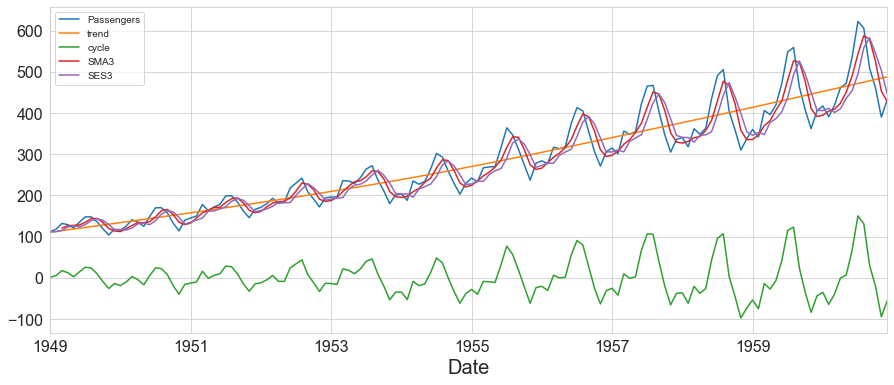

In [151]:
y.plot(figsize=(15,6));

Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

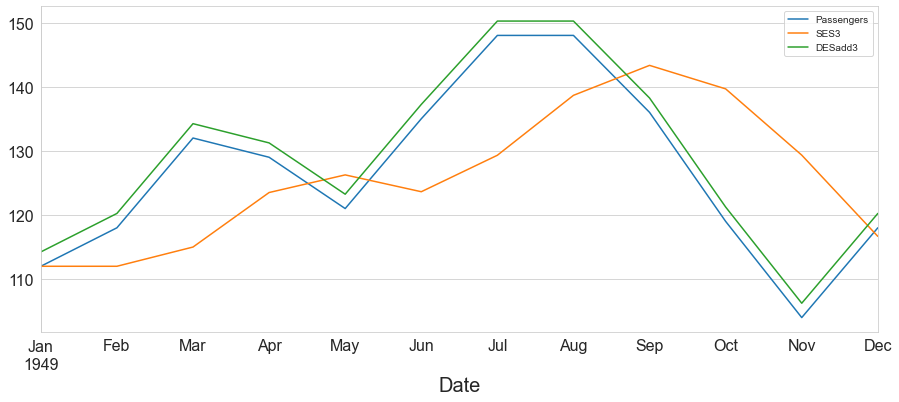

In [153]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

y['DESadd3'] = ExponentialSmoothing(y['Passengers'], trend='add').fit().fittedvalues.shift(-1)
y[['Passengers', 'SES3', 'DESadd3']].iloc[:12].plot(figsize=(15,6));

Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


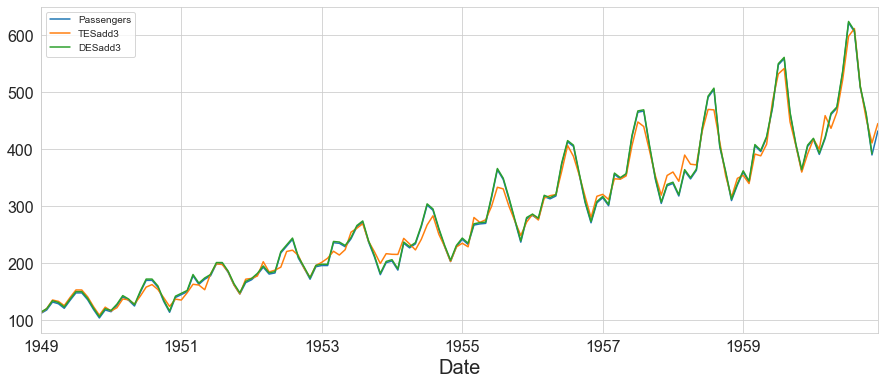

In [154]:
y['TESadd3'] = ExponentialSmoothing(y['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
y[['Passengers', 'TESadd3', 'DESadd3']].plot(figsize=(15,6));

Simple forecasting methods
Average method
Here, the forecasts of all future values are equal to the mean of the historical data.

Naïve method
For naïve forecasts, we simply set all forecasts to be the value of the last observation.

Seasonal naïve method
In this case, we set each forecast to be equal to the last observed value from the same season of the year.

Drift method
A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data.

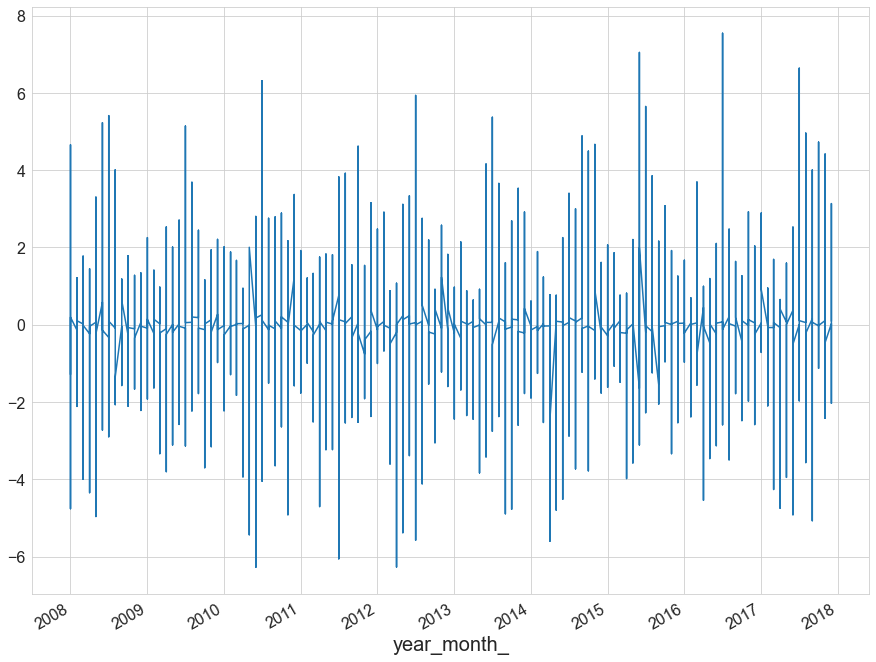

In [119]:
series.diff().plot()

In [121]:
d1=series.diff()

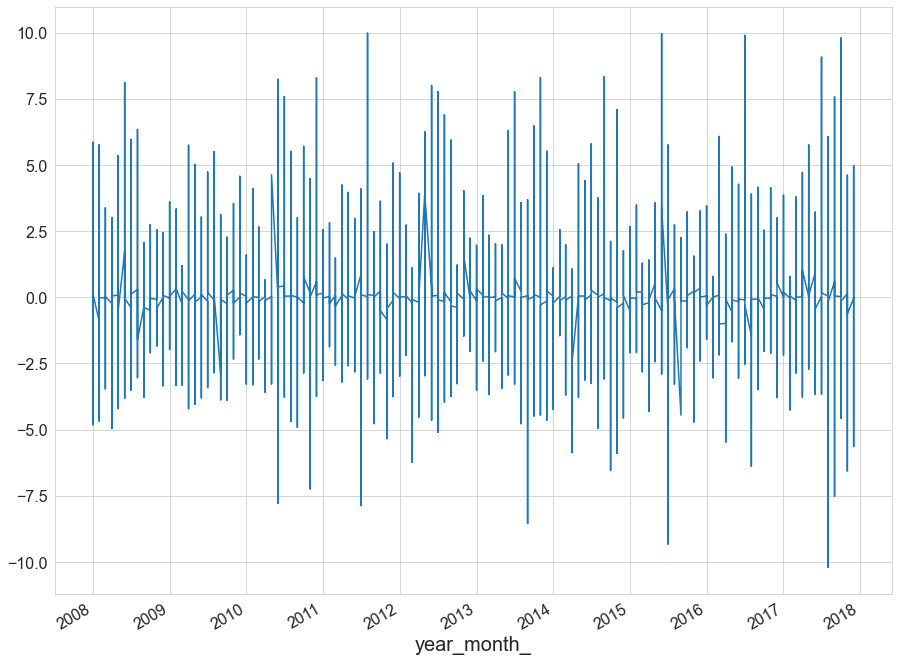

In [123]:
d2=d1.diff()
d1.diff().plot()